* 导入机器学习算法相关工具包

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

1. 加载数据

In [69]:
data_RCO = pd.read_csv('Rice_Cammeo_Osmancik.csv')
data_RCO.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


2. 数据预处理

In [70]:
# 特征集,包含前7列数据
X = data_RCO.iloc[:, data_RCO.columns != 'Class']
Y = data_RCO['Class']


In [71]:
# 分割验证集和训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

3. 算法应用 : 决策树 (DT)

In [72]:
# 构建决策树模型 (Decision Tree)
DT = DecisionTreeClassifier(random_state=3)

In [73]:
# 使用网格搜索进行超参数调优
# parameters = {'splitter':('best','random')
#                 ,'criterion':("gini","entropy")
#                 ,"max_depth":[*range(1,10)]
#                 ,'min_samples_leaf':[*range(1,50,5)]
#                 ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
# }
# GS = GridSearchCV(DT, parameters, cv=10)
# GS.fit(Xtrain,Ytrain)
# print(GS.best_params_)
# print(GS.best_score_)
#
# score = DT.score(Xtest, Ytest)
# print(score)


In [74]:
# 训练模型
DT.fit(Xtrain,Ytrain)

DecisionTreeClassifier(random_state=3)

In [75]:
# 评估模型
score = DT.score(Xtest, Ytest)
print(score)

0.889763779527559


In [76]:
# 使用测试集对模型进行预测
y_predict = DT.predict(Xtest)
print(y_predict[0])

Osmancik


4. 可视化分析

[Text(0.5, 0.875, 'Major_Axis_Length <= 191.817\ngini = 0.488\nsamples = 3048\nvalue = [1289, 1759]\nclass = Osmancik'),
 Text(0.25, 0.625, 'Major_Axis_Length <= 181.237\ngini = 0.111\nsamples = 1761\nvalue = [104, 1657]\nclass = Osmancik'),
 Text(0.125, 0.375, 'Extent <= 0.824\ngini = 0.017\nsamples = 1288\nvalue = [11, 1277]\nclass = Osmancik'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Major_Axis_Length <= 186.506\ngini = 0.316\nsamples = 473\nvalue = [93, 380]\nclass = Osmancik'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Perimeter <= 467.825\ngini = 0.146\nsamples = 1287\nvalue = [1185, 102]\nclass = Cammeo'),
 Text(0.625, 0.375, 'Major_Axis_Length <= 192.971\ngini = 0.441\nsamples = 195\nvalue = [131, 64]\nclass = Cammeo'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Major_Axis_Length <= 206.255\ngini = 0.067\nsamp

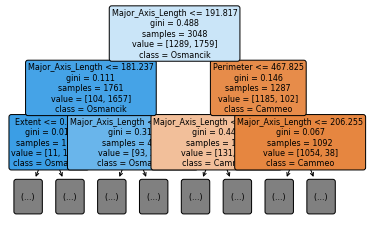

In [79]:
feature_names = data_RCO.columns[:7]
target_names = data_RCO['Class'].unique().tolist()
plot_tree(DT,feature_names=feature_names,class_names=target_names,filled=True,rounded=True, max_depth=2, fontsize=8)
# plt.savefig('RCC_DT.png', dpi=300)